Author: Hari Adhikari


In this final assignment, i would like to investigate the geographical position (location) of Nepalese Resturant in Helsinki region. Besides that i would also like to see how accessible they are from the nearest train and metro stations. Furthermore, i would like to see, the possible new areas for opening Nepali resturants in Helsinki regions, based on population density. 

So far, i have manually identified the location of each Nepali resturant from Google search, as they were not available in 1) Trip advisor and 2) Open Street Map. This data can be read from data folder "listofnepaliResturants.txt"


Install and import necessary modules 

- Install Geopandas  
conda install -c conda-forge geopandas  
- Install Shapely  
conda install -c conda-forge shapely  
- Install geoplot  
conda install -c conda-forge geoplot  
- Install osmnx  
conda install -c conda-forge osmnx  
- Install pysal  
conda install -c conda-forge pysal  
- Install contextily  
conda install -c conda-forge contextily  
- Install rasterio  
conda install -c conda-forge rasterio  
- Install rasterstats  
conda install -c conda-forge rasterstats  

In [1]:
# To run the whole script, we need to import some modules
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point, LineString, Polygon
import osmnx
import pysal
import cartopy
import geoplot
import osmnx
import folium
import rasterio
import contextily
import matplotlib.pyplot as plt
%matplotlib inline

/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indic

In [3]:
#origins = pd.read_csv("data/listofnepaliResturants.txt")
data = r"Data/listofnepaliResturants.txt"

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
data = pd.read_csv(data, sep=';')

In [4]:
# Check your input data
print(data.head())

   id                     name                                  addr
0   1      Ravintola Base Camp      Yliopistonkatu 5, 00100 Helsinki
1   2       Ravintola Mountain  Nordenskiöldinkatu 8, 00250 Helsinki
2   3  Ravintola Satkar Kamppi      Fredrikinkatu 46, 00100 Helsinki
3   4       Ravintola Kantipur      Lönnrotinkatu 25, 00180 Helsinki
4   5     Mount Everest Kamppi    Lapinlahdenkatu 15, 00180 Helsinki


In [5]:
# Import the geocoding tool
from geopandas.tools import geocode

# Geocode the adrresses
geo = None

# Geocode addresses with Nominatim backend
geo = geocode(data['addr'], provider = 'nominatim', user_agent = 'autogis_student_2')
print(geo.head(7))
print(type(geodata))

                                             address  \
0  Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...   
1  Mountain (Nepalese kitchen), 8, Nordenskiöldin...   
2  Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...   
3  Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...   
4  15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...   
5  Pikku Nepal Cross Kitchen, 3, Sörnäistenlaitur...   
6  Himalaya, 1a, Ratakatu, Kaartinkaupunki, Etelä...   

                        geometry  
0  POINT (24.9466636 60.1699095)  
1  POINT (24.9169656 60.1863164)  
2  POINT (24.9327188 60.1673745)  
3   POINT (24.933405 60.1647085)  
4  POINT (24.9280348 60.1669584)  
5  POINT (24.9837796 60.1851661)  
6  POINT (24.9456106 60.1637353)  


NameError: name 'geodata' is not defined

In [5]:
# Join the tables
geodata = None

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geodata = geo.join(data)
geodata.head()

,address,geometry,id,name,addr
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",POINT (24.9466636 60.1699095),1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki"
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",POINT (24.9169656 60.1863164),2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki"
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",POINT (24.9327188 60.1673745),3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki"
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",POINT (24.933405 60.1647085),4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki"
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",POINT (24.9280348 60.1669584),5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki"


In [6]:
geodata['Latitude'] = geodata['geometry'].y
geodata['Longitude'] = geodata['geometry'].x
geodata.head(5)
#geodata.to_file(driver = 'ESRI Shapefile', filename= "Data/NepaliResturantLocation.shp")

,address,geometry,id,name,addr,Latitude,Longitude
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",POINT (24.9466636 60.1699095),1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki",60.169910,24.946664
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",POINT (24.9169656 60.1863164),2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki",60.186316,24.916966
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",POINT (24.9327188 60.1673745),3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki",60.167375,24.932719
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",POINT (24.933405 60.1647085),4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki",60.164709,24.933405
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",POINT (24.9280348 60.1669584),5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki",60.166958,24.928035


In [2]:
geodata = "Data/NepaliResturantLocation.shp"
geodata = gpd.read_file(geodata)
geodata.head()

,address,id,name,addr,Latitude,Longitude,geometry
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki",60.169910,24.946664,POINT (24.9466636 60.1699095)
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki",60.186316,24.916966,POINT (24.9169656 60.1863164)
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki",60.167375,24.932719,POINT (24.9327188 60.1673745)
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki",60.164709,24.933405,POINT (24.933405 60.1647085)
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki",60.166958,24.928035,POINT (24.9280348 60.1669584)


In [3]:
locations = geodata[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[60.163146, 24.927851]

In [4]:
# Project geodata to Gauskruger 4, Finland
print(geodata.crs)
geodata = geodata.to_crs(epsg=3879)
print(geodata.crs)

# save the GeoDataFrame
#geodata.to_file(driver = 'ESRI Shapefile', filename= "Data/NepaliResturantLocation.shp")

{'init': 'epsg:4326'}
{'no_defs': True, 'init': 'epsg:3879'}


In [5]:
import folium.plugins

#from folium.plugins import MarkerCluster

map2 = folium.Map(location=[geodata['Latitude'].mean(),geodata['Longitude'].mean()], tiles='Stamen Terrain', zoom_start=11)
marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=geodata['name'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(marker_cluster)
map2


In [24]:
outfp = "Data/NepaleseResturantInHelsinkiRegionsCluster.html"
map2.save(outfp)

In [7]:
import geopandas as gpd

#MetroStation = "Data/MetroStationsInHelsinki.geojson"
#MetroStation = gpd.read_file(MetroStation)
#print(type(MetroStation))

TrainStation = "Data/Trainstation.geojson"
TrainStation = gpd.read_file(TrainStation)
print(type(TrainStation))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [8]:
TrainStation.head(2)

,id,@id,@relations,addr:city,addr:housenumber,addr:postcode,addr:street,alt_name,alt_name:en,alt_name:sv,...,contact:website,layer,level,internet_access:fee,old_name:fi,old_name:sv,subway,uic_ref,name:lt,geometry
0,way/52203591,way/52203591,"[ { ""role"": ""platform"", ""rel"": 4000897, ""relta...",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (25.0775456 60.2099213, 25.0775403 ..."
1,way/45860664,way/45860664,"[ { ""role"": ""platform"", ""rel"": 4000923, ""relta...",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (25.1416189 60.207132, 25.1416139 6..."


In [10]:
# mark each station as a point
m = folium.Map(location=[60.20, 24.9], zoom_start=12)

for index, row in geodata.iterrows():
    folium.Circle([row['Latitude'], row['Longitude']],
                        radius=1000,
                        popup=row['name'],
                        fill_color="red", # divvy color "#3db7e4"
                       ).add_to(m)
    
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=geodata['name'][point], icon=folium.Icon(color='red', icon_color='white', icon='home', angle=0, prefix='fa')).add_to(m)
    
folium.GeoJson(TrainStation).add_to(m)
#folium.GeoJson(roads).add_to(m)
folium.LatLngPopup().add_to(m)

m.add_child(folium.LatLngPopup())

m
#folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map)

In [ ]:
outfp = "Data/NepaleseResturantInHelsinkiRegions.html"
map.save(outfp)

I want to calculate the density of poeple within the 1km radius  
then also want to see how far the resturant are from the nearest metro or train stations.  
Also plot cloropleth map based on population sum in the study area.  


In [11]:
# Lets convert the point data frame into polygon data frame (polygon)
geodata1 = geodata
geodata1['geometry'] = geodata1.geometry.buffer(2000)
print(geodata1.head(2))

                                             address  id                 name  \
0  Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...   1  Ravintola Base Camp   
1  Mountain (Nepalese kitchen), 8, Nordenskiöldin...   2   Ravintola Mountain   

                                   addr   Latitude  Longitude  \
0      Yliopistonkatu 5, 00100 Helsinki  60.169910  24.946664   
1  Nordenskiöldinkatu 8, 00250 Helsinki  60.186316  24.916966   

                                            geometry  
0  POLYGON ((25499039.10323264 6673004.266015369,...  
1  POLYGON ((25497392.75849388 6674833.946911993,...  


In [12]:
print(geodata1.head(2))
type(geodata1)

# save the GeoDataFrame
#geodata1.to_file(driver = 'ESRI Shapefile', filename= "NepaliResturant2kmBuffer.shp")

                                             address  id                 name  \
0  Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...   1  Ravintola Base Camp   
1  Mountain (Nepalese kitchen), 8, Nordenskiöldin...   2   Ravintola Mountain   

                                   addr   Latitude  Longitude  \
0      Yliopistonkatu 5, 00100 Helsinki  60.169910  24.946664   
1  Nordenskiöldinkatu 8, 00250 Helsinki  60.186316  24.916966   

                                            geometry  
0  POLYGON ((25499039.10323264 6673004.266015369,...  
1  POLYGON ((25497392.75849388 6674833.946911993,...  


geopandas.geodataframe.GeoDataFrame

Execute the following steps in a terminal window  
Navigate to the data folder 
- cd Data
- wget  "https://www.hsy.fi/sites/AvoinData/AvoinData/SYT/Tietoyhteistyoyksikko/Shape%20(Esri)/V%C3%A4est%C3%B6tietoruudukko/Vaestotietoruudukko_2017_SHP.zip"
- unzip Vaestotietoruudukko_2017_SHP.zip 

This is the population grid for Helsinki region for year 2017. we also have population data for 2015 also. We will check if the population has increased or decreased in the buffer of those resturants. 

In [14]:
import geopandas as gpd
HelPop = gpd.read_file("Data/Vaestoruudukko_2017.shp")
print(HelPop.head(2))
type(HelPop)
print(HelPop.crs)

   INDEX  ASUKKAITA  ASVALJYYS  IKA0_9  IKA10_19  IKA20_29  IKA30_39  \
0    688          9       28.0      99        99        99        99   
1    710          8       44.0      99        99        99        99   

   IKA40_49  IKA50_59  IKA60_69  IKA70_79  IKA_YLI80  \
0        99        99        99        99         99   
1        99        99        99        99         99   

                                            geometry  
0  POLYGON Z ((25472499.99532626 6689749.00506918...  
1  POLYGON Z ((25472499.99532626 6684249.00413040...  
{'units': 'm', 'k': 1, 'proj': 'tmerc', 'lon_0': 25, 'y_0': 0, 'lat_0': 0, 'no_defs': True, 'x_0': 25500000, 'ellps': 'GRS80'}


In [15]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# Columns that will be sected
selected_cols = ['ASUKKAITA', 'geometry']

# Select those columns
HelPop = HelPop[selected_cols]

# Let's see the last 2 rows
HelPop.head(2)

,ASUKKAITA,geometry
0,9,POLYGON Z ((25472499.99532626 6689749.00506918...
1,8,POLYGON Z ((25472499.99532626 6684249.00413040...


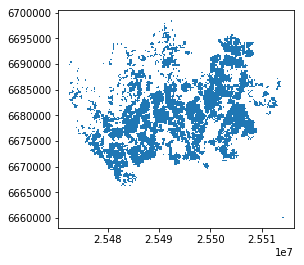

In [16]:
HelPop.plot()

In [17]:
# Are the layers in the same projection?
print(geodata1.crs)
print(HelPop.crs)

# Reproject the population data according to geodata
#HelPop = HelPop.to_crs(geodata1.crs)

#Let's re-project geodata to the projection of the population layer:
geodata1 = geodata1.to_crs(HelPop.crs)

# Also lets project train station into the same projection like population data
TrainStation = TrainStation.to_crs(HelPop.crs)

# Lets check if the projection are same or not?
print(geodata1.crs == HelPop.crs)
print(TrainStation.crs == HelPop.crs)

{'no_defs': True, 'init': 'epsg:3879'}
{'units': 'm', 'k': 1, 'proj': 'tmerc', 'lon_0': 25, 'y_0': 0, 'lat_0': 0, 'no_defs': True, 'x_0': 25500000, 'ellps': 'GRS80'}
True
True


In [21]:
# Make a spatial join
HelPop1 = gpd.sjoin(HelPop, geodata1, how="inner", op="within")

# Let's check the result
print(HelPop1.head(3))


     ASUKKAITA                                           geometry  \
245        112  POLYGON Z ((25477999.99289177 6672499.00485264...   
246         11  POLYGON Z ((25477999.99289177 6672249.00571924...   
262        299  POLYGON Z ((25478249.998907 6672749.003986047 ...   

     index_right                                            address  id  \
245           48  K-Market Kivenlahdenkatu, 1, Kivenlahdenkatu, ...  49   
246           48  K-Market Kivenlahdenkatu, 1, Kivenlahdenkatu, ...  49   
262           48  K-Market Kivenlahdenkatu, 1, Kivenlahdenkatu, ...  49   

                name                            addr   Latitude  Longitude  
245  Ravintola Nepal  Kivenlahdenkatu 1, 02320 Espoo  60.155727  24.631354  
246  Ravintola Nepal  Kivenlahdenkatu 1, 02320 Espoo  60.155727  24.631354  
262  Ravintola Nepal  Kivenlahdenkatu 1, 02320 Espoo  60.155727  24.631354  


In [22]:
print(geodata1.head(3))

                                             address  id  \
0  Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...   1   
1  Mountain (Nepalese kitchen), 8, Nordenskiöldin...   2   
2  Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...   3   

                      name                                  addr   Latitude  \
0      Ravintola Base Camp      Yliopistonkatu 5, 00100 Helsinki  60.169910   
1       Ravintola Mountain  Nordenskiöldinkatu 8, 00250 Helsinki  60.186316   
2  Ravintola Satkar Kamppi      Fredrikinkatu 46, 00100 Helsinki  60.167375   

   Longitude                                           geometry  
0  24.946664  POLYGON ((25499039.10323264 6673004.266015369,...  
1  24.916966  POLYGON ((25497392.75849388 6674833.946911993,...  
2  24.932719  POLYGON ((25498264.68931959 6672722.535584947,...  


In [26]:
Pop = HelPop1.groupby(['id'])['ASUKKAITA'].sum()
#print("Population living within 5km from {}")
print(Pop.head())
type(Pop)
#print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(mean_area, 2)))

#print ("Population living within 5km from %s is %s respectively." % ( ("Itis", "Forum", "Iso-omena", "Sello", "Jumbo", "REDI"), (175632,230376, 109081,174200, 93621, 249187)))

id
1    89239
2    61261
3    80701
4    76357
5    75782
Name: ASUKKAITA, dtype: int64


pandas.core.series.Series

In [40]:
geodata1 = geodata1.assign(Pop=Pop.values)
geodata1.head()

,address,id,name,addr,Latitude,Longitude,geometry,Pop
0,"Caverna, 5, Yliopistonkatu, Keskusta, Kluuvi, ...",1,Ravintola Base Camp,"Yliopistonkatu 5, 00100 Helsinki",60.169910,24.946664,"POLYGON ((25499039.10323264 6673004.266015369,...",89239
1,"Mountain (Nepalese kitchen), 8, Nordenskiöldin...",2,Ravintola Mountain,"Nordenskiöldinkatu 8, 00250 Helsinki",60.186316,24.916966,"POLYGON ((25497392.75849388 6674833.946911993,...",61261
2,"Fredrikinkatu, Kamppi, Eteläinen suurpiiri, He...",3,Ravintola Satkar Kamppi,"Fredrikinkatu 46, 00100 Helsinki",60.167375,24.932719,"POLYGON ((25498264.68931959 6672722.535584947,...",80701
3,"Boothill, 25, Lönnrotinkatu, Kamppi, Eteläinen...",4,Ravintola Kantipur,"Lönnrotinkatu 25, 00180 Helsinki",60.164709,24.933405,"POLYGON ((25498302.48620421 6672425.464407455,...",76357
4,"15, Lapinlahdenkatu, Kamppi, Eteläinen suurpii...",5,Mount Everest Kamppi,"Lapinlahdenkatu 15, 00180 Helsinki",60.166958,24.928035,"POLYGON ((25498004.59304756 6672676.449891192,...",75782


In [42]:
selected_cols = ['id','geometry', 'Pop']

# Select those columns
geodata2 = geodata1[selected_cols]
geodata2.head()

,id,geometry,Pop
0,1,"POLYGON ((25499039.10323264 6673004.266015369,...",89239
1,2,"POLYGON ((25497392.75849388 6674833.946911993,...",61261
2,3,"POLYGON ((25498264.68931959 6672722.535584947,...",80701
3,4,"POLYGON ((25498302.48620421 6672425.464407455,...",76357
4,5,"POLYGON ((25498004.59304756 6672676.449891192,...",75782


In [44]:
geodata2.to_file(filename='NepaliResturant2kmBufferPopulation.geojson', driver='GeoJSON')

In [49]:
import pandas as pd
#kanton_overview = r'Switzerland_overview.csv'
#kanton_data = pd.read_csv(kanton_overview)
kanton_data = geodata1


kanton_map2 = folium.Map(location=[60.20, 24.9], 
                    zoom_start=7.5)
kanton_map2.choropleth(geo_path='geodata2.geojson', data=geodata2,
             columns=['id', 'Pop'],
             #key_on='feature.properties.KANTONSNUM',
             threshold_scale=[10000, 20000, 30000, 50000, 100000, 500000],
             fill_color='BuPu')
kanton_map2

TypeError: __init__() missing 1 required positional argument: 'geo_data'

In [48]:
m = folium.Map(location=[60.20, 24.9], zoom_start=12)
folium.GeoJson(geodata2).add_to(m)
m.choropleth(geo_str=geodata2, data=geodata2, 
                columns=['id', 'Pop'], 
                #key_on='feature.id',
                fill_color='YlGn', 
                fill_opacity=0.7, line_opacity=0.2,
                legend_name='geodata2')
m

TypeError: __init__() missing 1 required positional argument: 'geo_data'

In [ ]:
#lotes = gpd.read_file("shapefiles/reProj/Lotes_Datos_epsg3857_SM.shp")
#lotes.crs = {'init' : 'epsg:3857'}

geoPath = geodata2.geometry.to_json()
data1 = geodata2.Area_Total.to_json()

mapa = folium.Map([60.20, 24.9], zoom_start=12, tiles='Stamen Toner',API_key='wrobstory.map-12345678')

mapa.choropleth(geo_str=geoPath, data=data1, 
                columns=['Lote', 'data1'], 
                key_on='feature.id',
                fill_color='YlGn', 
                fill_opacity=0.7, line_opacity=0.2,
                legend_name='data1')
mapa


#mapa.save(outfile = 'shapefiles/reProj/test.html')

In [ ]:
#add markers
for each in points:
    folium.Marker(each).add_to(my_map)
 
#add lines
folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map)

In [ ]:
import matplotlib.pyplot as plt

# Plot the points with population info
join.plot(column='pop17', cmap="Reds", markersize=7, scheme='quantiles', legend=True);

# Add title
plt.title("Amount of inhabitants living close the the point");

# Remove white space around the figure
plt.tight_layout()

In [29]:
#geodata1.to_file(filename='NepaliResturant2kmBuffer.geojson', driver='GeoJSON')
#geodata1.to_file(filename='geodata1.shp', driver="ESRI Shapefile")

In [41]:
#import folium
#m = folium.Map([60.2, 24.9], zoom_start=11, tiles='cartodbpositron')
#folium.GeoJson(geodata1).add_to(m)
#folium.LatLngPopup().add_to(m)
#m

In [35]:
#import geopandas as gpd
#from shapely.geometry import Polygon
#
#lat_point_list = [60.169910, 60.186316, 60.167375, 60.164709]
#lon_point_list = [24.946664,  24.916966, 24.932719, 24.933405]

#polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
#crs = {'init': 'epsg:4326'}
#polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
#print(polygon.geometry)

#polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
#polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

In [15]:
#metro = r"Data/metro.shp"
#roads = r"Data/roads.shp"

# Read files
#roads = gpd.read_file(roads)
#metro = gpd.read_file(metro)

#roads.to_file(filename='roads.geojson', driver='GeoJSON')
#polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

In [23]:
#print(metro.head(2))
#print(geodata.head(2))
#print(roads.head(2))